In [3]:
!pip install imbalanced-learn --quiet

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')
#Manipulação de dados: pandas, numpy

#Visualização: matplotlib, seaborn

#Pré-processamento e modelagem: sklearn

#Balanceamento: SMOTE da imblearn para resolver o desbalanceamento do dataset (fraudes são minoria).


In [6]:
from google.colab import files
uploaded = files.upload()

# Lendo o CSV
df = pd.read_csv('creditcard.csv')
df.head()

Saving creditcard.csv to creditcard.csv


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
from google.colab import files

def carregar_dados():
    print("Faça upload do arquivo 'creditcard.csv'")
    uploaded = files.upload()
    df = pd.read_csv('creditcard.csv')
    print("Dados carregados com sucesso")
    return df

df = carregar_dados()


Faça upload do arquivo 'creditcard.csv'


Saving creditcard.csv to creditcard (1).csv
Dados carregados com sucesso


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

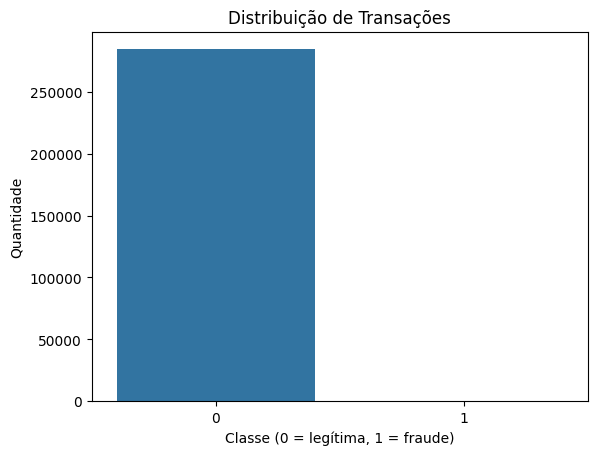

In [16]:
def analisar_dados(df):
    print(df.info())
    print(df.describe())
    print(df['Class'].value_counts(normalize=True))

    sns.countplot(x='Class', data=df)
    plt.title('Distribuição de Transações')
    plt.xlabel('Classe (0 = legítima, 1 = fraude)')
    plt.ylabel('Quantidade')
    plt.show()

analisar_dados(df)
#info() e describe() mostram a estrutura e resumo estatístico.
#value_counts() mostra o desbalanceamento.
#Gráfico de barras com a distribuição das classes

In [24]:
def preparar_dados(df):
    X = df.drop('Class', axis=1)
    y = df['Class']

    rus = RandomUnderSampler(random_state=42)
    X_res, y_res = rus.fit_resample(X, y)
    print("Dados balanceados:", y_res.value_counts().to_dict())

    # Escalonamento
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_res)

    return train_test_split(X_scaled, y_res, test_size=0.3, random_state=42)

X_train, X_test, y_train, y_test = preparar_dados(df)
#Separa variáveis preditoras (X) da variável alvo (y).
#Aplica undersampling para equilibrar as classes.
#Aplica escalonamento para normalizar os dados.
#Divide em treino/teste (70/30).

Dados balanceados: {0: 492, 1: 492}


In [27]:
def treinar_modelo(X_train, y_train):
    modelo = RandomForestClassifier(n_estimators=100, random_state=42)
    modelo.fit(X_train, y_train)
    print("Modelo treinado com sucesso!")
    return modelo

modelo = treinar_modelo(X_train, y_train)
#Cria o modelo Random Forest com 100 árvores.
#Treina com os dados balanceados.

Modelo treinado com sucesso!


Acurácia: 93.58 %

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       150
           1       0.96      0.90      0.93       146

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



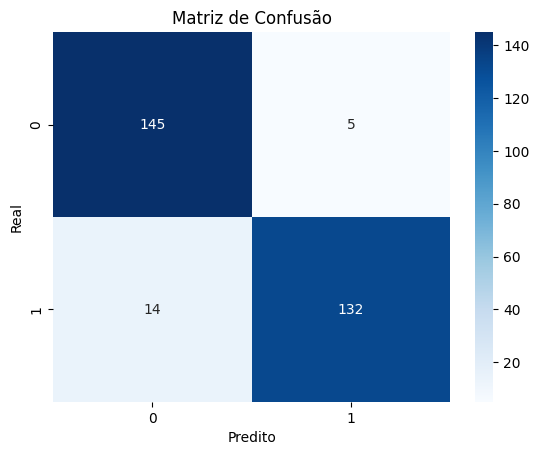

0.9358108108108109

In [30]:
def avaliar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print("Acurácia:", round(acc * 100, 2), "%")
    print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Matriz de Confusão")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()

    return acc

avaliar_modelo(modelo, X_test, y_test)
#Faz previsões.
#Calcula acurácia, precisão, recall e f1-score.
#Exibe matriz de confusão com heatmap.


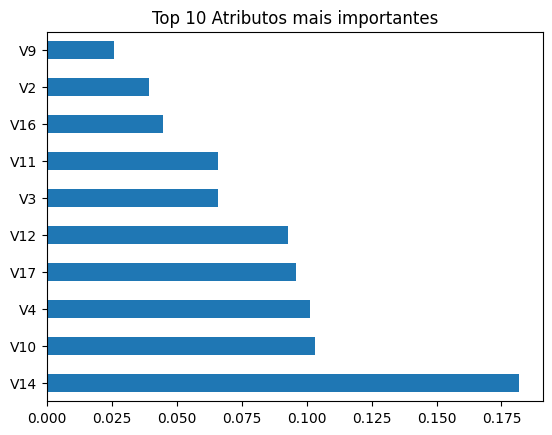

In [31]:
def mostrar_importancia(modelo, nomes_features):
    importances = pd.Series(modelo.feature_importances_, index=nomes_features)
    importances.nlargest(10).plot(kind='barh')
    plt.title("Top 10 Atributos mais importantes")
    plt.show()

mostrar_importancia(modelo, df.drop('Class', axis=1).columns)
#Identifica as 10 variáveis que mais influenciaram o modelo.

In [23]:
class No:
    def __init__(self, valor):
        self.valor = valor
        self.esquerda = None
        self.direita = None

class ArvoreBinaria:
    def __init__(self):
        self.raiz = None

    def inserir(self, valor):
        if self.raiz is None:
            self.raiz = No(valor)
        else:
            self._inserir(self.raiz, valor)

    def _inserir(self, no, valor):
        if valor < no.valor:
            if no.esquerda is None:
                no.esquerda = No(valor)
            else:
                self._inserir(no.esquerda, valor)
        else:
            if no.direita is None:
                no.direita = No(valor)
            else:
                self._inserir(no.direita, valor)

    def em_ordem(self):
        return self._em_ordem(self.raiz)

    def _em_ordem(self, no):
        if no is None:
            return []
        return self._em_ordem(no.esquerda) + [no.valor] + self._em_ordem(no.direita)

# Exemplo de uso
arvore = ArvoreBinaria()
for valor in [87, 92, 85, 90, 88]:
    arvore.inserir(valor)

print("Valores ordenados da árvore:", arvore.em_ordem())
#Implementa manualmente uma árvore binária de busca.
#Insere valores e imprime eles em ordem crescente.


Valores ordenados da árvore: [85, 87, 88, 90, 92]
